In [1]:
import matplotlib.pyplot as plt
import numpy as np
import flavio
import flavio.plots as fp

from flavio.statistics.likelihood import FastLikelihood
from wilson import Wilson

flavio.__version__

'2.3.3'

In [2]:
flavio.measurements.read_file('my_bsll_measurements.yml')

['LHCb Bs->mumu hi-lumi',
 'LHCb RK and RK* hi-lumi',
 'AS Bs->mumu BR average March 2021',
 'HFLAV Bs->mumu BR average October 2022',
 'CDF Bs->mumu BR July 2011',
 'CDF Lambdab->Lambdamumu BR July 2011',
 'CDF B+->Kmumu BR July 2011',
 'CDF B+->Kmumu BR November 2011',
 'CDF B0->Kmumu BR July 2011',
 'CDF B0->Kmumu BR November 2011',
 'CDF B0->K*mumu BR July 2011',
 'CDF B0->K*mumu BR November 2011',
 'CDF B+->K*mumu BR July 2011',
 'CDF B+->K*mumu BR November 2011',
 'CDF Bs->phimumu BR July 2011',
 'CDF B0->K*mumu angular August 2011',
 'CDF B0->K*mumu CP August 2011',
 'CDF B+->Kmumu angular August 2011',
 'CDF Lambdab->Lambdamumu BR July 2012',
 'CDF B+->Kmumu BR July 2012',
 'CDF B0->Kmumu BR July 2012',
 'CDF B0->K*mumu BR July 2012',
 'CDF B+->K*mumu BR July 2012',
 'CDF Bs->phimumu BR July 2012',
 'CDF B0->K*mumu angular July 2012',
 'CDF B0->K*mumu CP July 2012',
 'CDF B+->Kmumu angular July 2012',
 'Belle B->Xsee BR December 2013',
 'Belle B->Xsmumu BR December 2013',
 'Bel

In [9]:
# This is a test, using the list from "November 10, 2011" from the "bsll_dates.txt" file.
# I am simply copying the list from the file, and call that list "my_measurements"

my_measurements = [
    'CDF Bs->mumu BR July 2011', 
    'CDF Lambdab->Lambdamumu BR July 2011', 
    'CDF B+->Kmumu BR November 2011', 
    'CDF B0->Kmumu BR November 2011', 
    'CDF B0->K*mumu BR November 2011', 
    'CDF B+->K*mumu BR November 2011', 
    'CDF Bs->phimumu BR July 2011', 
    'CDF B0->K*mumu angular August 2011', 
    'CDF B0->K*mumu CP August 2011', 
    'CDF B+->Kmumu angular August 2011', 
    'CMS and LHCb Bs->mumu BR August 2011', 
    'LHCb B0->K*mumu BR August 2011', 
    'LHCb B0->K*mumu angular August 2011',
]

# The tricky part is to figure out which observables one needs to include.
# I went to the "my_bsll_measurements.yml" file, searched for all the entries above,
# and enter all the observables in a new list, that I call "all_observables"

my_observables = [
    'BR(Bs->mumu)', 
    ('<dBR/dq2>(Lambdab->Lambdamumu)', 1.0, 6.0),
    ('<dBR/dq2>(B+->Kmumu)', 1.0, 6.0),
    ('<dBR/dq2>(B0->Kmumu)', 1.0, 6.0),
    ('<dBR/dq2>(B0->K*mumu)', 1.0, 6.0),
    ('<dBR/dq2>(B+->K*mumu)', 1.0, 6.0),
    ('<dBR/dq2>(Bs->phimumu)', 1.0, 6.0),
    ('<FL>(B0->K*mumu)', 1.0, 6.0),
    ('<AFB>(B0->K*mumu)', 1.0, 6.0),
    ('<P1>(B0->K*mumu)', 1.0, 6.0),
    ('<A9>(B0->K*mumu)', 1.0, 6.0),
#    ('<AFB>(B+->Kmumu)', 1.0, 6.0),  for some reason, that one slows down everything by a lot. I therefore ignore it
]

In [10]:
# this tells flavio to use the measurements and observables in the lists above

FL_my_fit = FastLikelihood(
    name = 'my_fit',
    observables = my_observables,
    include_measurements = my_measurements
    )

In [11]:
# here I am updating some of the imput parameters for flavio 
# (this is unrelated to what we are trying to do, but should be done in any case)

flavio.default_parameters.set_constraint('Vcb', '4.08(14)e-2')
flavio.default_parameters.set_constraint('Vub', '3.82(20)e-3')
flavio.default_parameters.set_constraint('Vus', '0.2243(8)')
flavio.default_parameters.set_constraint('delta', '1.15(6)')

In [12]:
%%time

# this is the command to let flavio perform the fit
# N should be as large as possible for a "real" plot (ideally something like 10000). 
# To get a quick result N = 100 is probably OK

FL_my_fit.make_measurement(N = 100, threads = 6)

CPU times: user 480 ms, sys: 91.2 ms, total: 571 ms
Wall time: 5.69 s


In [13]:
# based on the above fit, this defines a likelihood function that can be plotted 

def FLL_my_fit(x):
    C9 , C10 = x
    par = flavio.default_parameters.get_central_all()
    wc = Wilson({'C9_bsmumu': C9, 'C10_bsmumu': C10}, scale=4.8, eft='WET', basis='flavio')
    return FL_my_fit.log_likelihood(par, wc)

/usr/lib/python3.6/site-packages/flavio/plots/plotfunctions.py:660: UserWarning: The smallest `z` value on the grid will be used as the minimum of the function to plot. This can lead to undesired results if the actual minimum is considerably different from the minimum on the grid. For better precision, the actual minimum should be provided in the `z_min` argument.
  warnings.warn("The smallest `z` value on the grid will be used as the "


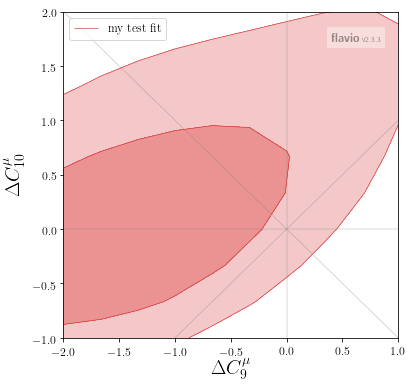

In [14]:
# and here is the plot 

plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)

fig = plt.figure(1, figsize = [6, 6])
fp.likelihood_contour(FLL_my_fit, -2, 1, -1, 2, n_sigma = (1, 2), label = 'my test fit', 
                      steps = 10, col = 3, threads = 6)
# steps = 10 is only for illustration; to get nice looking plots use at least 50 steps
# note that already with steps = 10 it can take several minutes if many observables are included

# this adds the "flavio" logo to the plot
fp.flavio_branding()
plt.legend(loc = 'upper left', fontsize = 12)

# this are the axes labels
plt.xlabel(r"$\Delta C_{9}^{\mu}$",fontsize = 20)
plt.ylabel(r"$\Delta C_{10}^{\mu}$",fontsize = 20)

# this adds the grey lines that cross at (0,0)
plt.axhline(y = 0.0, linewidth = 0.3, color = 'grey')
plt.axvline(x = 0.0, linewidth = 0.3, color = 'grey')
x = np.linspace(-1,1,100)
plt.plot(x,x, linewidth = 0.3, color = 'grey')
x = np.linspace(-2,1,100)
plt.plot(x,-x, linewidth = 0.3, color = 'grey')

# plt.savefig("C9_C10_test.pdf")
plt.show()

In [15]:
from iminuit import minimize
# this is a minimization package that we use to determine the best fit point

In [16]:
# approximate the log likelihood with gaussians
# uncertainties and correlation are encoded in the Hessian 
def to_minimize(x): return -2*FLL_my_fit(x)
minimize(to_minimize,(0,0))

      fun: -238.31386756557305
 hess_inv: array([[1.05520929, 0.31112224],
       [0.31112224, 0.35260396]])
  message: 'Optimization terminated successfully.'
   minuit: <iminuit._libiminuit.Minuit object at 0x55778eab2258>
     nfev: 45
     njev: 0
  success: True
        x: array([-1.52816581, -0.10341554])